<a href="https://colab.research.google.com/github/AdanALalawni/HousePricePrediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explor Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdanALalawni/HousePricePrediction/main/USA_Housing.csv')

In [3]:
df.head(4)
df.drop('Address',axis=1,inplace=True)

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

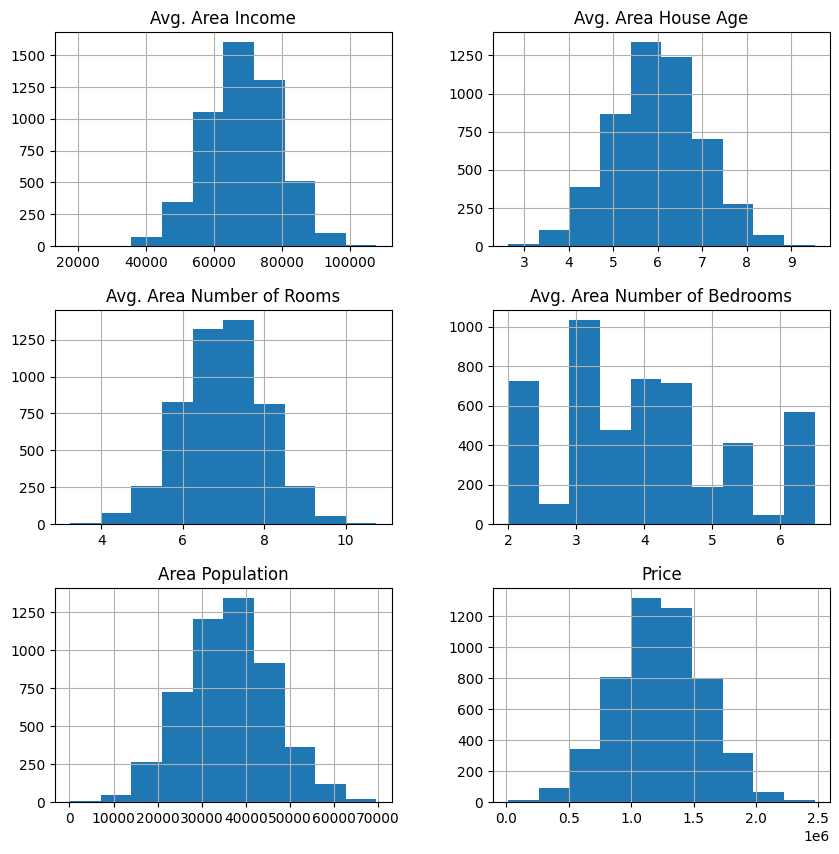

In [4]:
df.hist(figsize=(10,10))

In [5]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [6]:
def outlier_plot(df):
  fig ,a=plt.subplots(6,2,figsize=(20,30))
  for i ,k in zip(a, df.columns):
    sns.boxplot(x=df[k],ax=i[0])
    sns.distplot(df[k],ax=i[1])
  plt.show()



<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k],ax=i[1])
<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k],ax=i[1])
<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed i

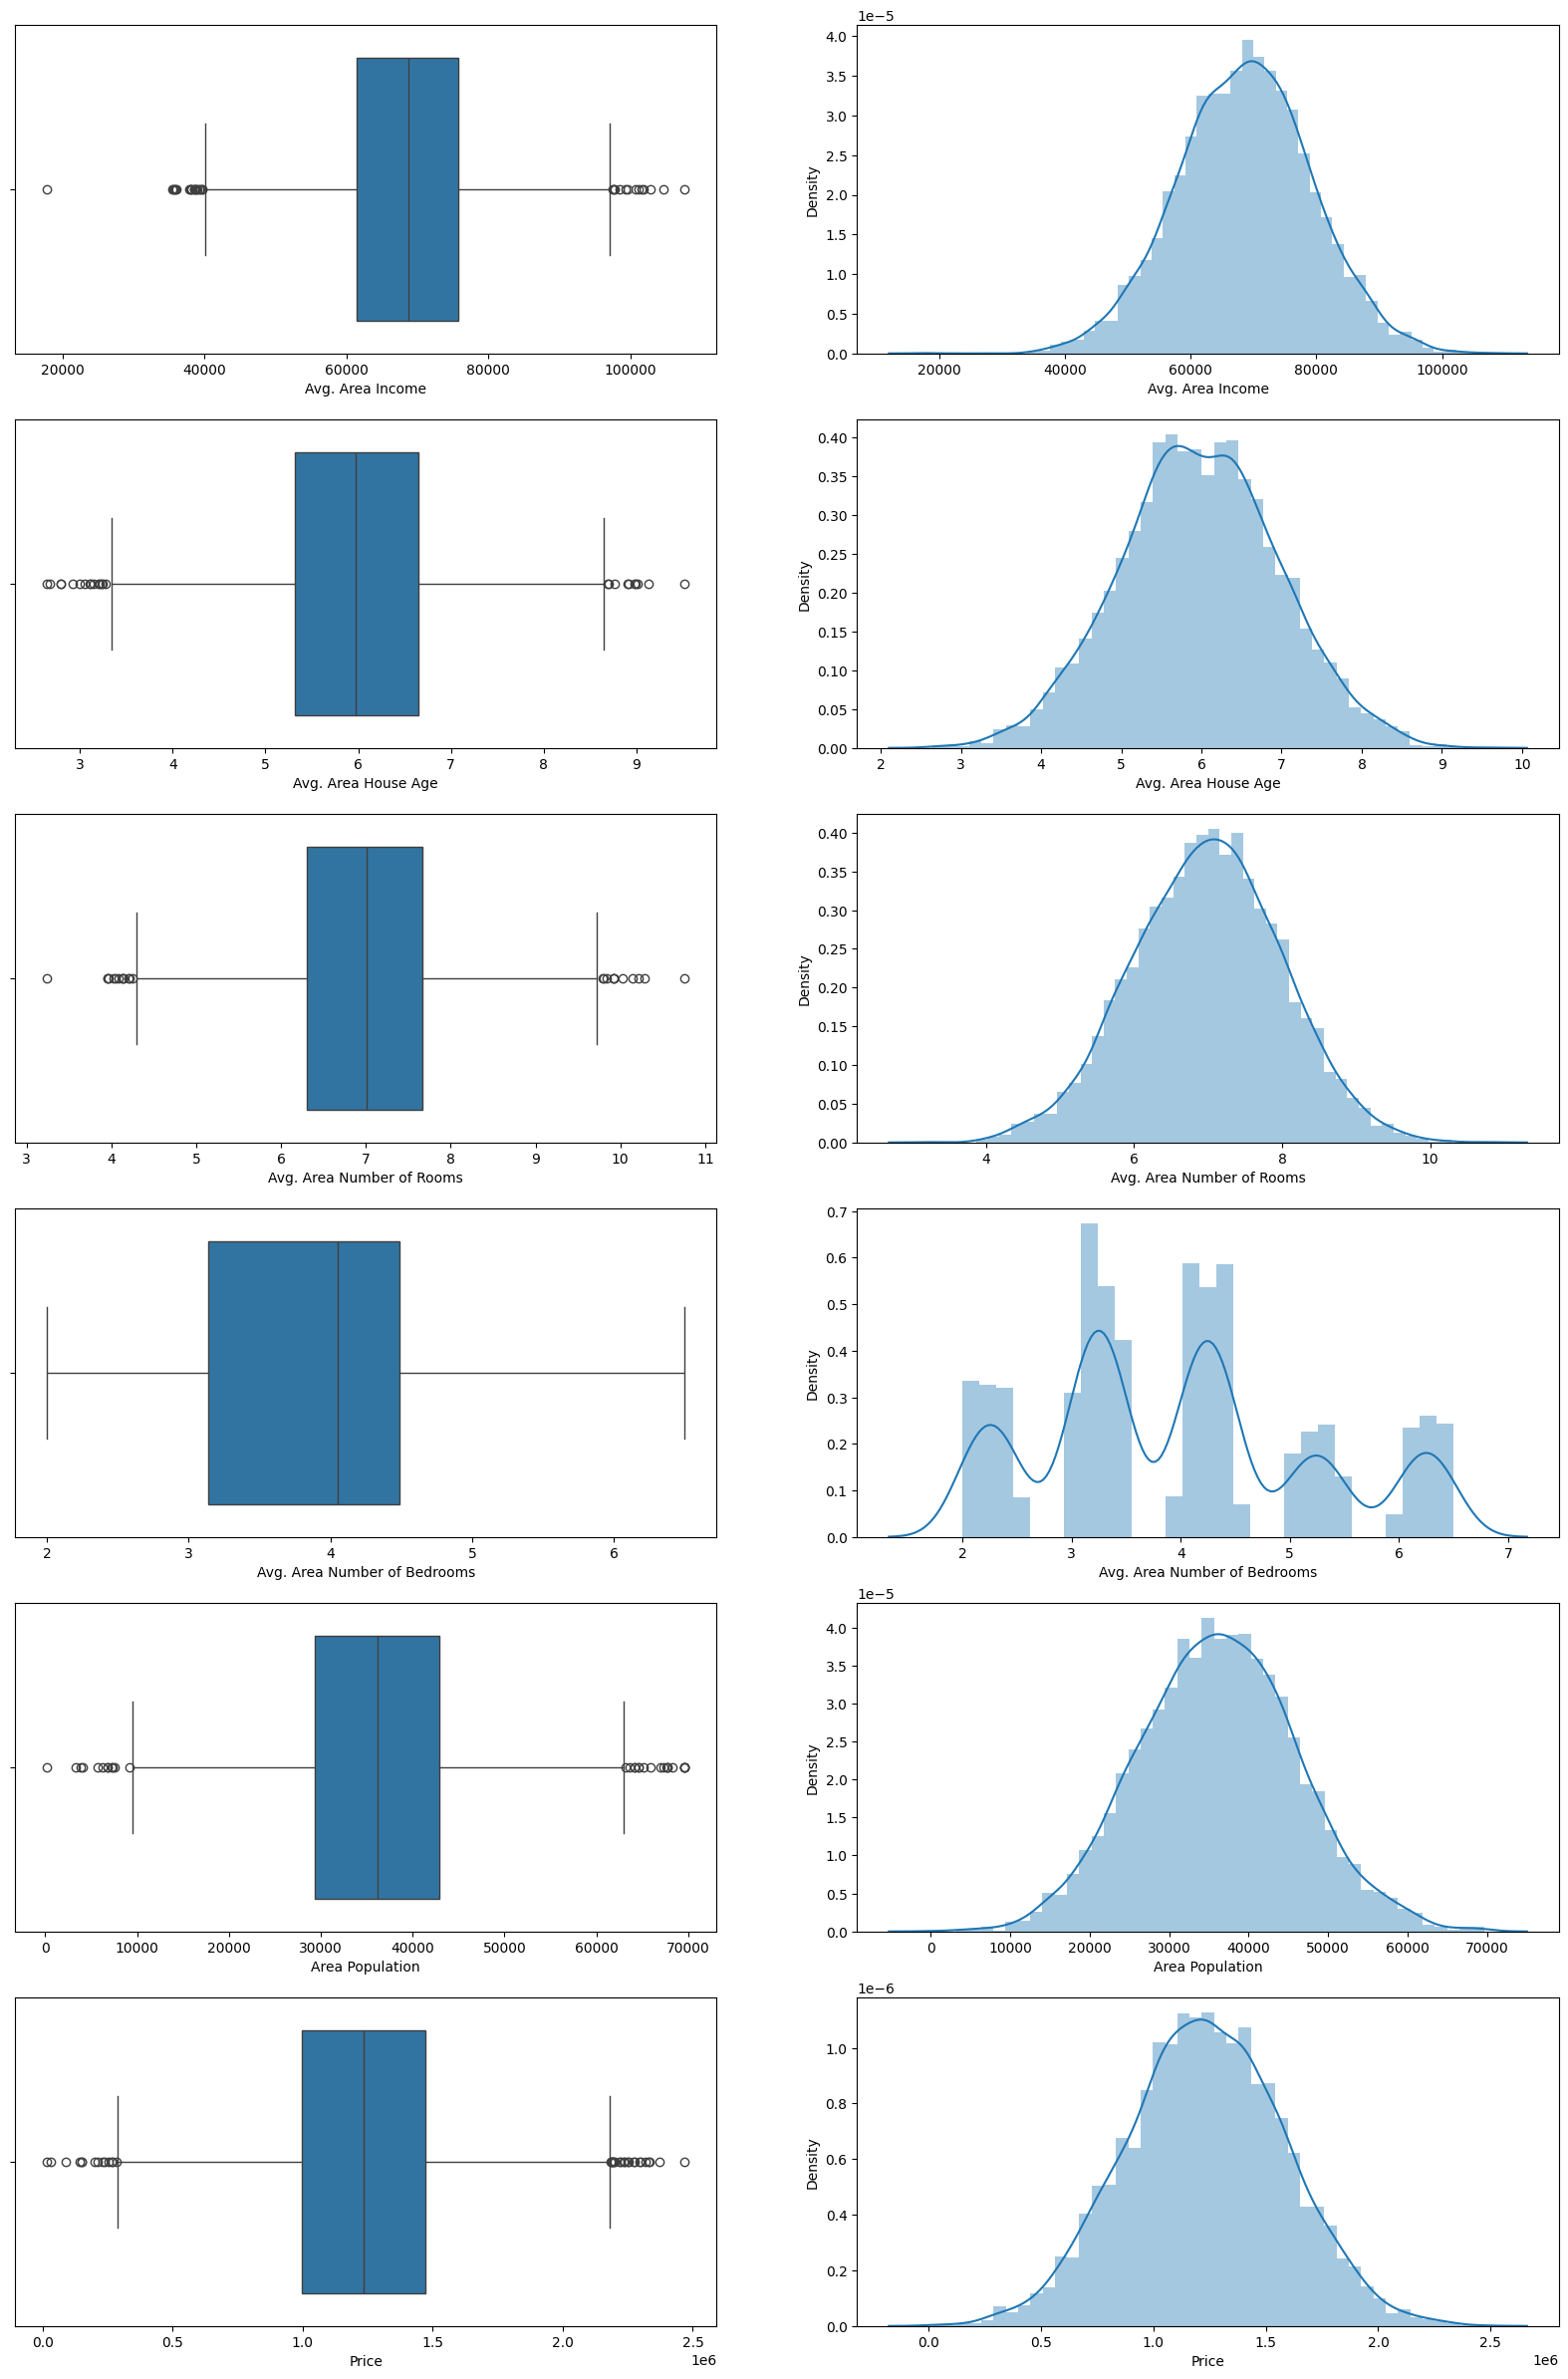

In [7]:
outlier_plot(df)

In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df_copy=df.copy()

In [10]:
from scipy.stats.mstats import winsorize
for i , j in df_copy.items():
  winsorize(j, (0.005, 0.005), inplace=True)

<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k],ax=i[1])
<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k],ax=i[1])
<ipython-input-6-3aed6214d5e7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed i

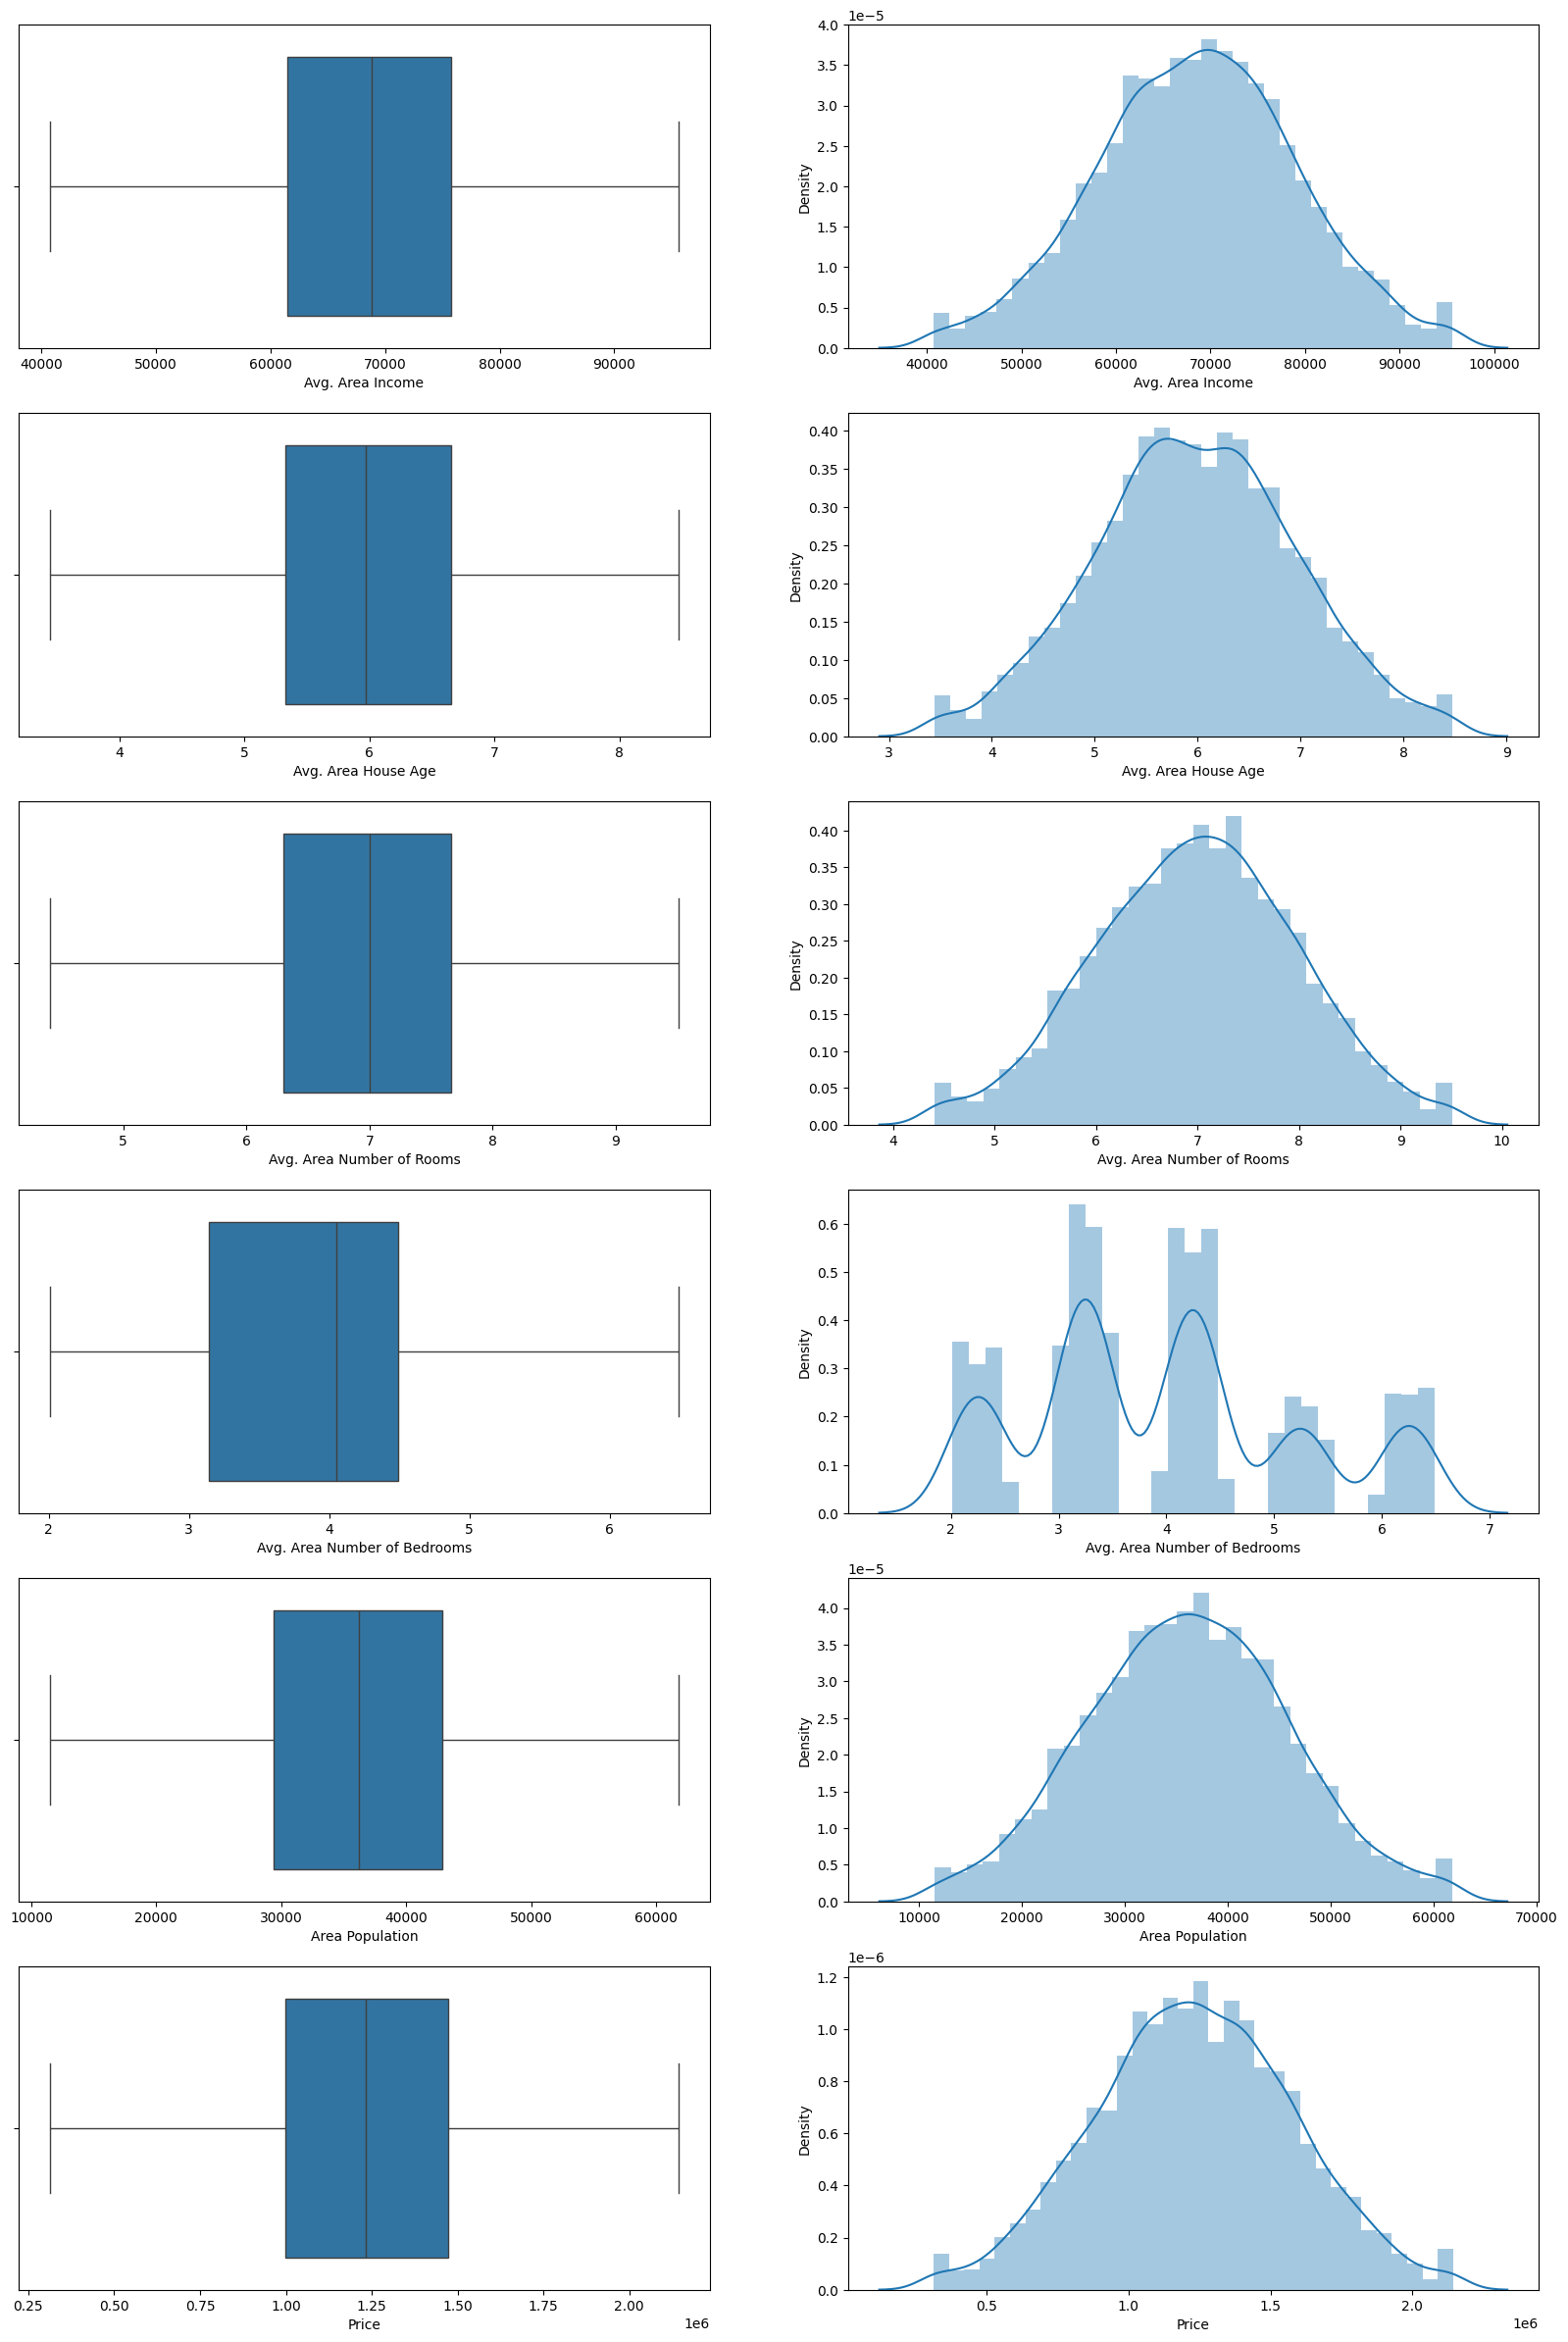

In [11]:
outlier_plot(df_copy)

<Axes: >

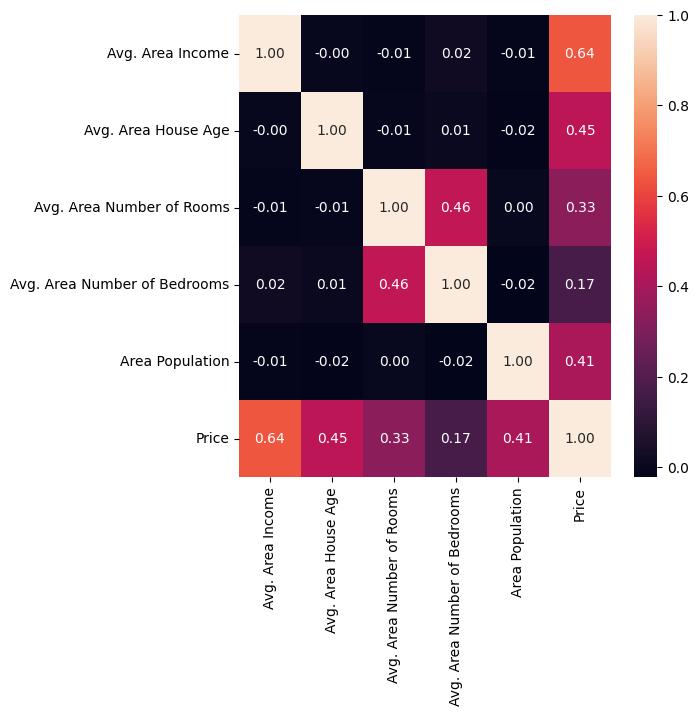

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

# Build Model

In [13]:
from sklearn.model_selection import train_test_split
X=df_copy.drop('Price',axis=1)
y=df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

I'll train many models to choose the best one

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [29]:
lr_reg=Pipeline([('scaler',StandardScaler()),('linearregression',LinearRegression(n_jobs=-1))])
ridge_reg=Pipeline([('scaler',StandardScaler()),('ridge',Ridge(alpha=0.1))])
lasso_reg=Pipeline([('scaler',StandardScaler()),('lasso',Lasso())])
rand_reg=Pipeline([('scaler',StandardScaler()),('random',RandomForestRegressor())])
dt_reg=Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeRegressor())])
xgb_reg=Pipeline([('scaler',StandardScaler()),('xgb',XGBRegressor())])

In [30]:
pips=['lr_reg','ridge_reg','lasso_reg','rand_reg','dt_reg','xgb_reg']

In [33]:
for i in pips:
  print(i ," : ",cross_val_score(eval(i),X_train,y_train,cv=5).mean())



lr_reg  :  0.9157042427445138
ridge_reg  :  0.9157042729744831
lasso_reg  :  0.9157042782841331
rand_reg  :  0.8801721940531166
dt_reg  :  0.7392926714737773
xgb_reg  :  0.8720264252726494


# Cross Validation - Randomized Search CV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
new_pip=Pipeline([('scaler',StandardScaler()),('classifier',LinearRegression())])

In [61]:
grid_params = [
    {"classifier": [LinearRegression()],
    "classifier__normalize": [True, False]
     },
    {"classifier": [Ridge()],
     "classifier__alpha": np.arange(0.5, 5, 0.25),
     "classifier__fit_intercept": [True, False],
     "classifier__max_iter": [50, 100, 500, 1000, 2500],
     "classifier__tol": [0.001, 0.01, 0.05, 0.1, 1, 5, 10],
     "classifier__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg,", "sag", "saga"]
    },
    {"classifier": [Lasso()],
    "classifier__alpha": np.arange(0.5, 5, 0.25),
    "classifier__fit_intercept": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000, 2500],
    "classifier__tol": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
    "classifier__warm_start": [True, False],
    "classifier__positive": [True, False],
    "classifier__selection": ["cyclic", "random"]
     }
]

In [62]:
random_result=RandomizedSearchCV(estimator=new_pip,
                                 param_distributions=grid_params,
                                 cv=8,
                                 scoring="neg_mean_squared_error",
                                 random_state=42,
                                 verbose=10,
                                 n_jobs=-1)

In [63]:
result=random_result.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [64]:
result.best_params_

{'classifier__tol': 0.001,
 'classifier__solver': 'cholesky',
 'classifier__max_iter': 50,
 'classifier__fit_intercept': True,
 'classifier__alpha': 2.75,
 'classifier': Ridge(alpha=2.75, max_iter=50, solver='cholesky', tol=0.001)}

In [65]:
ridge_pip=Pipeline([('scaler',StandardScaler()),('rid_reg',Ridge(tol=0.001,solver='cholesky',max_iter=50,alpha=2.75))])

In [66]:
model=ridge_pip.fit(X_train,y_train)

In [67]:
y_pred=model.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
print(f"MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"R2 : {r2_score(y_test,y_pred):.2f}")
print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred)*100 :.2f} %")

MSE : 10140031320.50
R2 : 0.91
MAE : 81296.57
MAPE : 7.39 %


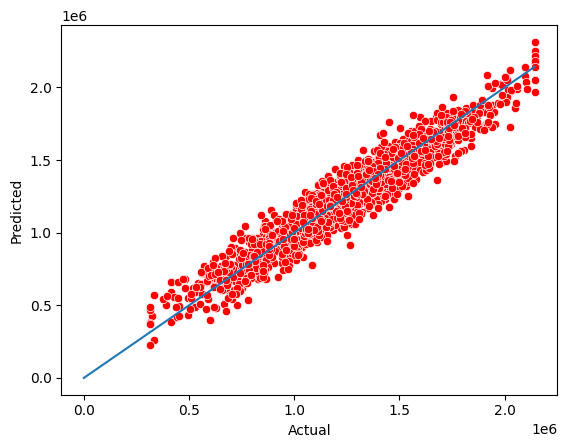

In [84]:
plt.plot([0,max(y_test)],[0,max(y_test)])
sns.scatterplot(x=y_test,y=y_pred , color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<ipython-input-87-cc03201b5ea9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)
<ipython-input-87-cc03201b5ea9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


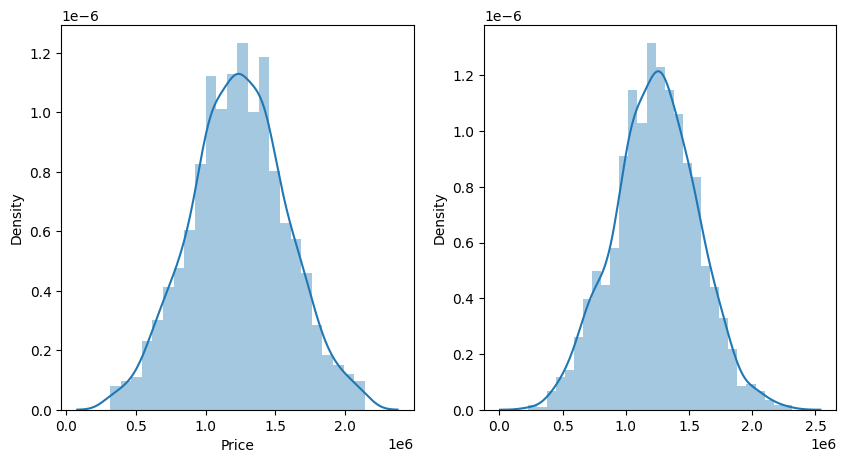

In [87]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_test)
plt.subplot(1,2,2)
sns.distplot(y_pred)
plt.show()